### Librerias

In [1]:
#importar librerías
import matplotlib.pyplot as plt
import numpy as np
from skimage import io, img_as_float
from skimage.color import rgb2gray
from skimage import data
from scipy.signal import convolve2d

<class 'numpy.ndarray'>


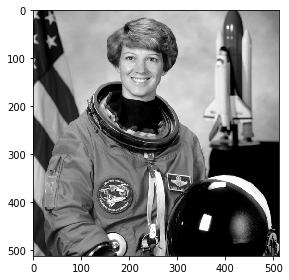

In [2]:
imtest1=data.astronaut()
io.imshow(imtest1)
imtestgray = rgb2gray(imtest1)
io.imshow(imtestgray)
print(type(imtestgray))

### Definición Funciones

In [3]:
#Función para crear arteactos impulsivos
def salypimienta(imagen,porcentage):
    img= np.array(imagen)
    img=img.flatten()
    
    tamañoImg=img.shape[0]
    for n in range(porcentage*tamañoImg//200):
            img[np.random.randint(tamañoImg,size=1)]=1
            img[np.random.randint(tamañoImg,size=1)]=0
    img=np.reshape(img,imagen.shape) 
    return img

#Mascara eliminación sal y pimienta
def medianamask(imagen,sizemask):
    img=np.array(imagen)
    N=(sizemask-1)//2
    S=img.shape
    for row in range(S[0]):
            for col in range(S[1]):
                    Lx=np.max([0,col-N])
                    Ux=np.min([S[1],col+N])
                    Ly=np.max([0,row-N])
                    Uy=np.min([S[0],row+N])
                    region=imagen[Ly:Uy,Lx:Ux].flatten()
                    #img[row,col]=region.sum()/region.size
                    # codigo para calcular la mediana
                    dOrder=sorted(region)
                    n=len(dOrder)
                    middle=n//2
                    if n%2==0:
                        img[row,col]=(dOrder[middle] + dOrder[middle-1]) / 2
                        
                    else:
                        img[row,col]=dOrder[middle-1]
    
    return img

def apply_mask(im,window):
    im_conv_d=convolve2d(im,window,mode="same", boundary="symm")
    return im_conv_d

def media_mask(img,window):
    #im_conv_d=convolve2d(im,window,mode="same", boundary="symm")
    N=window.shape[0]//2
    S=img.shape
    for row in range(S[0]):
            for col in range(S[1]):
                    Lx=np.max([0,col-N])
                    Ux=np.min([S[1],col+N])
                    Ly=np.max([0,row-N])
                    Uy=np.min([S[0],row+N])
                    region=img[Ly:Uy,Lx:Ux].flatten()
    
    img[row,col]=region.sum()/region.size
    return img

def scale_img(im,maxv):
    mn = np.min(im)
    mx = np.max(im)
    output=(im-mn)*maxv/(mx-mn)
    return output

    

### Filtro Sal y Pimienta

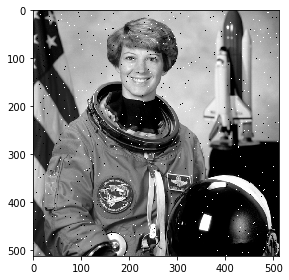

In [4]:
#Sal y pimienta
effect=salypimienta(imtestgray,1)
io.imshow(effect)


### Filtro de Mediana

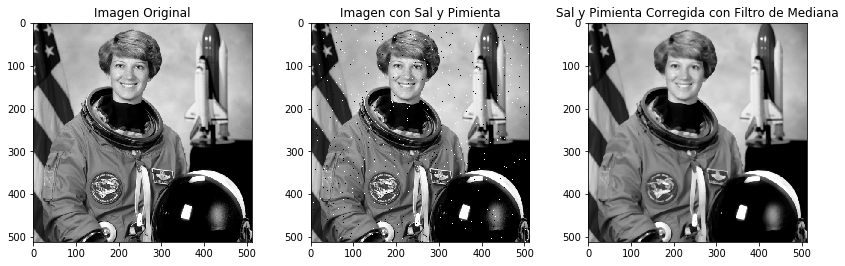

In [8]:
#Ventana
n=5
im_filt=medianamask(effect,n)

#Plotear Imagenes
fig, axes = plt.subplots(1, 3, figsize=(12, 8))
ax = axes.ravel()

ax[0].imshow(imtestgray, cmap=plt.cm.gray)
ax[0].set_title("Imagen Original")

ax[1].imshow(effect, cmap=plt.cm.gray)
ax[1].set_title("Imagen con Sal y Pimienta")

ax[2].imshow(im_filt, cmap=plt.cm.gray)
ax[2].set_title("Sal y Pimienta Corregida con Filtro de Mediana")

fig.tight_layout()
plt.show()

### Filtro de Detección Bordes

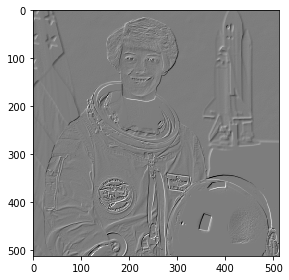

In [6]:
#Filtro detección de bordes - Operador de Sobel
window1=np.asarray([[-1,0,1],[-2,0,2],[-1,0,1]])
window2=np.asarray([[-1,-2,-1],[0,0,0],[1,2,1]])
window=window1+window2
im_filt=apply_mask(imtestgray,window)
imr=scale_img(im_filt,1)

io.imshow(imr)
io.show()

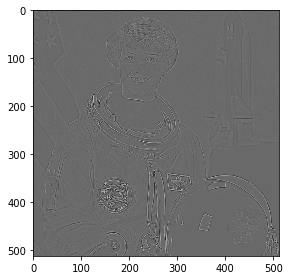

In [7]:
#Filtro detección de bordes - Segunda Derivada
window3=np.asarray([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])

im_filt3=apply_mask(imtestgray,window3)

imr=scale_img(im_filt3,1)

io.imshow(imr)
io.show()

El filtro que mejor resultado obtuuvo para eliminar el anterior del sal y pimienta fue el de la mediana, como vimos en el temario. Cuanto más ampliamos el disco, mayor distorsión aparece en la imagen filtrada.

Para reconocer bordes, se observa un resultado más notorio con el filtro de paso alto de Sobel, ya que se resaltan tantos los bordes horizontales y verticales ante las posiciones cercanas al bordeado.